<h1> Model Comparison </h1>

In [1]:
# LSTM imports

import numpy as np
import pandas as pd
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import time

In [2]:
# RF imports

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('svg')
sns.set_style("darkgrid")

In [ ]:
# read the data
data = pd.read_csv('final_dataset.csv')
data.head()

In [3]:
# read the data
data = pd.read_csv('final_dataset.csv')
data.head()

ISO_Code        Date  Additional health/documents requirements upon arrival  \
0      AUT  2020-01-01                                                  0       
1      AUT  2020-01-01                                                  0       
2      AUT  2020-01-02                                                  0       
3      AUT  2020-01-02                                                  0       
4      AUT  2020-01-03                                                  0       

   Amendments to funeral and burial regulations  Awareness campaigns  \
0                                             0                    0   
1                                             0                    0   
2                                             0                    0   
3                                             0                    0   
4                                             0                    0   

   Border checks   Border closure   Changes in prison-related policies  \
0               0                0                                   0   
1               0                0                                   0   
2               0                0                                   0   
3               0                0                                   0   
4               0                0                                   0   

   Checkpoints within the country  Closure of businesses and public services  \
0                               0                                          0   
1                               0                                          0   
2                               0                                          0   
3                               0                                          0   
4                               0                                          0   

   ...  H2_Testing policy  H3_Contact tracing  \
0  ...                0.0                 0.0   
1  ...                0.0                 0.0   
2  ...                0.0                 0.0   
3  ...                0.0                 0.0   
4  ...                0.0                 0.0   

   H4_Emergency investment in healthcare  H5_Investment in vaccines  \
0                                    0.0                        0.0   
1                                    0.0                        0.0   
2                                    0.0                        0.0   
3                                    0.0                        0.0   
4                                    0.0                        0.0   

   StringencyIndex  GovernmentResponseIndex  ContainmentHealthIndex  \
0              0.0                      0.0                     0.0   
1              0.0                      0.0                     0.0   
2              0.0                      0.0                     0.0   
3              0.0                      0.0                     0.0   
4              0.0                      0.0                     0.0   

   EconomicSupportIndex  IndustrialProduction  unemployment_rate  
0                   0.0                117.27           6.004297  
1                   0.0                117.27           6.004297  
2                   0.0                117.27           6.004297  
3                   0.0                117.27           6.004297  
4                   0.0                117.27           6.004297  

[5 rows x 98 columns]

In [4]:
#insert for each year a support variable for the number of days of the specific year. Except 2020, all 365. 
#range of days
days_total = range(1, 427)
print(len(days_total))

426


In [5]:
print(len(data)/21)


426.0


In [6]:
#reset index
data.reset_index()

#for loop below do not have to iterate through each row, only through each country
DAYSS = data.ISO_Code.unique()

#insert Date in a fixed column
data.insert(loc=1, column='DAY', value = " ")

#for each country add date range
for ISO_Code in DAYSS:
    data.loc[data.ISO_Code == ISO_Code, "DAY"] = days_total

data.head(300)

ISO_Code  DAY        Date  \
0        AUT    1  2020-01-01   
1        AUT    2  2020-01-01   
2        AUT    3  2020-01-02   
3        AUT    4  2020-01-02   
4        AUT    5  2020-01-03   
..       ...  ...         ...   
295      AUT  296  2020-05-27   
296      AUT  297  2020-05-28   
297      AUT  298  2020-05-28   
298      AUT  299  2020-05-29   
299      AUT  300  2020-05-29   

     Additional health/documents requirements upon arrival  \
0                                                    0       
1                                                    0       
2                                                    0       
3                                                    0       
4                                                    0       
..                                                 ...       
295                                                  1       
296                                                  1       
297                                                  1       
298                                                  1       
299                                                  1       

     Amendments to funeral and burial regulations  Awareness campaigns  \
0                                               0                    0   
1                                               0                    0   
2                                               0                    0   
3                                               0                    0   
4                                               0                    0   
..                                            ...                  ...   
295                                             0                    1   
296                                             0                    1   
297                                             0                    1   
298                                             0                    1   
299                                             0                    1   

     Border checks   Border closure   Changes in prison-related policies  \
0                 0                0                                   0   
1                 0                0                                   0   
2                 0                0                                   0   
3                 0                0                                   0   
4                 0                0                                   0   
..              ...              ...                                 ...   
295               1                1                                   0   
296               1                1                                   0   
297               1                1                                   0   
298               1                1                                   0   
299               1                1                                   0   

     Checkpoints within the country  ...  H2_Testing policy  \
0                                 0  ...                0.0   
1                                 0  ...                0.0   
2                                 0  ...                0.0   
3                                 0  ...                0.0   
4                                 0  ...                0.0   
..                              ...  ...                ...   
295                               0  ...                2.0   
296                               0  ...                2.0   
297                               0  ...                2.0   
298                               0  ...                3.0   
299                               0  ...                3.0   

     H3_Contact tracing  H4_Emergency investment in healthcare  \
0                   0.0                                    0.0   
1                   0.0                                    0.0   
2                   0.0                                    0.0   
3                   0.0                

In [7]:
# drop columns containing NaN, possibility to normalize, currently deactivated

for col in list(data):
    length = len(data)
    
    if not (col == 'TOTAL_CO2_MED' or col == 'new_cases_per_million' or col == 'DAY'):

        if type(data[col][140]) is not type(''):
            #print('do nothin')
            #print(type(data[col][140]))
            data[col]=data[col]*1#(data[col]-data[col].min())/(data[col].max()-data[col].min())
            #print('Nomalized')
        
        if int((data[col].isnull().sum()/length)*100) > 0:
            data =data.drop(col,axis=1)
            print('dropped: ', col)

In [8]:
for col in list(data):
    length = len(data)
    data[col].isnull().sum()
    print("NaNs in " + col + ": " + str((data[col].isnull().sum()/length)*100) +"%" )

    if not (col == 'TOTAL_CO2_MED' or col == 'new_cases_per_million' or col == 'DAY'):
        #norm all
        if type(data[col][140]) is not type(''):
            print(type(data[col][140]))
            data[col]=(data[col]-data[col].min())/(data[col].max()-data[col].min())
            print('Nomalized')

        if float((data[col].isnull().sum()/length)*100) > 0:
            data =data.drop(col,axis=1)
            print('Dropped')
        else:
            print(data[col].min(),data[col].max())
    else:
        print('Not normalized, not dropped')
        print(data[col].min(),data[col].max())
    

    print('---')
data['new_cases_per_million'] = np.abs(data['new_cases_per_million'])

NaNs in ISO_Code: 0.0%
AUT SWE
---
NaNs in DAY: 0.0%
Not normalized, not dropped
1 426
---
NaNs in Date: 0.0%
2020-01-01 2020-07-31
---
NaNs in Additional health/documents requirements upon arrival: 0.0%
<class 'numpy.int64'>
Nomalized
0.0 1.0
---
NaNs in Amendments to funeral and burial regulations: 0.0%
<class 'numpy.int64'>
Nomalized
0.0 1.0
---
NaNs in Awareness campaigns: 0.0%
<class 'numpy.int64'>
Nomalized
0.0 1.0
---
NaNs in Border checks : 0.0%
<class 'numpy.int64'>
Nomalized
0.0 1.0
---
NaNs in Border closure : 0.0%
<class 'numpy.int64'>
Nomalized
0.0 1.0
---
NaNs in Changes in prison-related policies: 0.0%
<class 'numpy.int64'>
Nomalized
0.0 1.0
---
NaNs in Checkpoints within the country: 0.0%
<class 'numpy.int64'>
Nomalized
0.0 1.0
---
NaNs in Closure of businesses and public services: 0.0%
<class 'numpy.int64'>
Nomalized
0.0 1.0
---
NaNs in Complete border closure: 0.0%
<class 'numpy.int64'>
Nomalized
Dropped
---
NaNs in Curfews: 0.0%
<class 'numpy.int64'>
Nomalized
0.0 1.

In [9]:
for i in range(data.shape[1]):
    print(i, data.columns[i])

0 ISO_Code
1 DAY
2 Date
3 Additional health/documents requirements upon arrival
4 Amendments to funeral and burial regulations
5 Awareness campaigns
6 Border checks 
7 Border closure 
8 Changes in prison-related policies
9 Checkpoints within the country
10 Closure of businesses and public services
11 Curfews
12 Domestic travel restrictions
13 Economic measures
14 Emergency administrative structures activated or established
15 Full lockdown
16 General recommendations
17 Health screenings in airports and border crossings
18 Humanitarian exemptions
19 International flights suspension
20 Isolation and quarantine policies
21 Limit product imports/exports
22 Limit public gatherings
23 Lockdown of refugee/idp camps or other minorities
24 Mass population testing
25 Military deployment
26 Other public health measures enforced
27 Partial lockdown
28 Psychological assistance and medical social work
29 Requirement to wear protective gear in public
30 Schools closure 
31 State of emergency declared

In [11]:
#Settings

PREDICTION = 39
FEATURES = [1, *range(3,37),*range(53,96)]


In [12]:

for i in FEATURES:
    print(data.columns[i])

#split data in training and testing set
#we want to predict new_cases per million
X = pd.DataFrame()
y = data.iloc[:, PREDICTION]


for ft in FEATURES:

    X = pd.concat([X, data.iloc[:,ft]], axis=1)
    
    length = len(data)
    data[data.columns[ft]].isnull().sum()

X = X.reset_index()

#list of countries:
C_list = data['ISO_Code'].unique()

#num of countries:
num_countries = len(data['ISO_Code'].unique())

#do a Test/train split:
lim = int(num_countries * 0.7)

X_train = pd.DataFrame()
y_train = pd.DataFrame()

X_test = pd.DataFrame()
y_test = pd.DataFrame()

country_feats = pd.DataFrame

for c in C_list[0:lim]:
    country = data[data['ISO_Code']==c]
    
    country_feats = country.iloc[:, FEATURES]
    country_pred = country.iloc[:, PREDICTION]
    
    X_train = X_train.append(country_feats)
    y_train = pd.concat([y_train, country_pred])          

country_feats = pd.DataFrame
        
        
for c in C_list[lim:]:
    country = data[data['ISO_Code']==c]
    
    country_feats = country.iloc[:, FEATURES]
    country_pred = country.iloc[:, PREDICTION]
    
    X_test = X_test.append(country_feats)
    y_test = pd.concat([y_test, country_pred])
                  

X_train_arr = np.asarray(X_train)
y_train_arr = np.asarray(y_train)
X_test_arr = np.asarray(X_test)
y_test_arr = np.asarray(y_test)


print(X_test_arr.shape)
print(y_test_arr.shape)
print(X_train_arr.shape)
print(y_train_arr.shape)

y_train_arr = np.nan_to_num(y_train_arr)
y_test_arr = np.nan_to_num(y_test_arr)


DAY
Additional health/documents requirements upon arrival
Amendments to funeral and burial regulations
Awareness campaigns
Border checks 
Border closure 
Changes in prison-related policies
Checkpoints within the country
Closure of businesses and public services
Curfews
Domestic travel restrictions
Economic measures
Emergency administrative structures activated or established
Full lockdown
General recommendations
Health screenings in airports and border crossings
Humanitarian exemptions
International flights suspension
Isolation and quarantine policies
Limit product imports/exports
Limit public gatherings
Lockdown of refugee/idp camps or other minorities
Mass population testing
Military deployment
Other public health measures enforced
Partial lockdown
Psychological assistance and medical social work
Requirement to wear protective gear in public
Schools closure 
State of emergency declared
Strengthening the public health system
Surveillance and monitoring
Testing policy
Visa restrictions

<h1> Random Forrest </h1>

In [13]:
# gridsearch random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
#from sklearn.ensemble import 

sc = StandardScaler()
rfr = RandomForestRegressor()
gsN = [200]#,250,500,1000]
gsK = [*range(11,13)]#np.arange(1,X_train.shape[1],2)

print(gsK)

### Validation
cval = KFold(n_splits=10, random_state=42)


pipe = Pipeline([('scaler',sc),('forest', rfr)])
model = TransformedTargetRegressor(regressor=pipe, transformer=StandardScaler())
param_grid = {'regressor__forest__n_estimators': gsN,
              'regressor__forest__max_features': gsK}

search = GridSearchCV(model, param_grid, n_jobs=4,cv=cval,scoring='neg_mean_squared_error',return_train_score=True)
search.fit(X_train_arr, y_train_arr)

print("Best parameter RMSE=%0.3f):" % np.sqrt(-search.best_score_))

print(search.best_params_)

[11, 12]


C:\Users\Keles\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best parameter RMSE=18.739):
{'regressor__forest__max_features': 12, 'regressor__forest__n_estimators': 200}


<h1> LSTM </h1>

In [16]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

**Training started with following params: lr= 0.001 | n_steps= 7 | hidden size= 25 | epochs= 100
Training on:  AUT
dict_keys(['loss'])


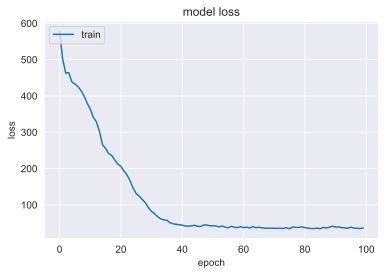

Training on:  BEL
dict_keys(['loss'])


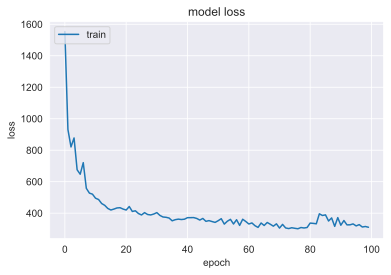

Training on:  CZE
dict_keys(['loss'])


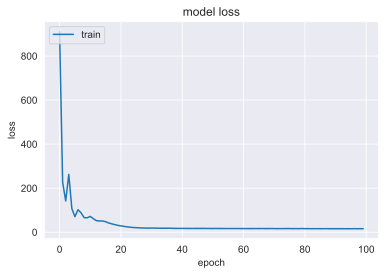

Training on:  DEU
dict_keys(['loss'])


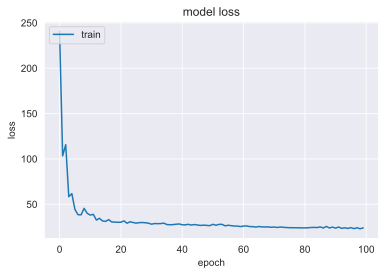

Training on:  DNK
dict_keys(['loss'])


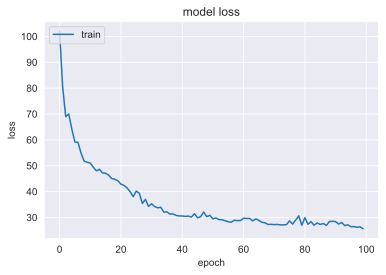

Training on:  ESP
dict_keys(['loss'])


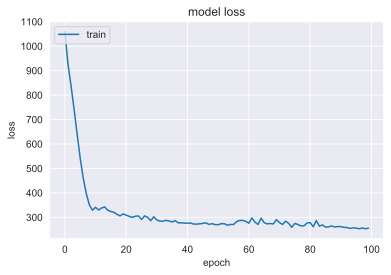

Training on:  EST
dict_keys(['loss'])


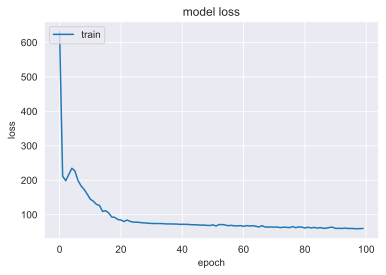

Training on:  FIN
dict_keys(['loss'])


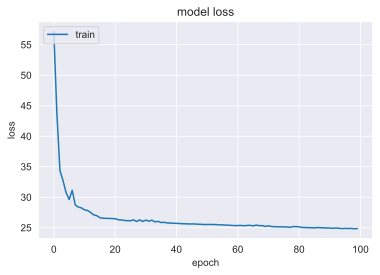

Training on:  FRA
dict_keys(['loss'])


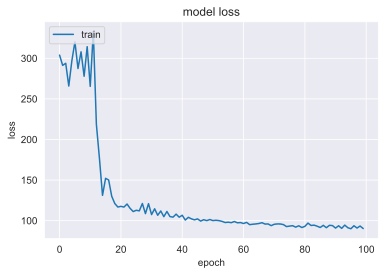

Training on:  GBR
dict_keys(['loss'])


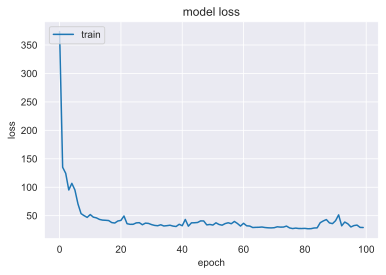

Training on:  GRC
dict_keys(['loss'])


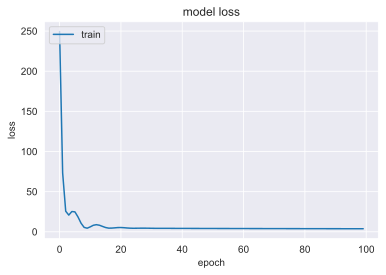

Training on:  HUN
dict_keys(['loss'])


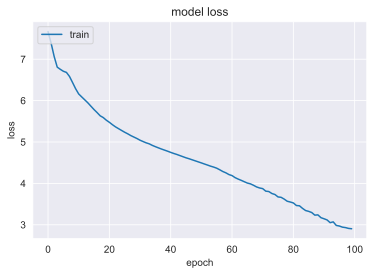

Training on:  IRL
dict_keys(['loss'])


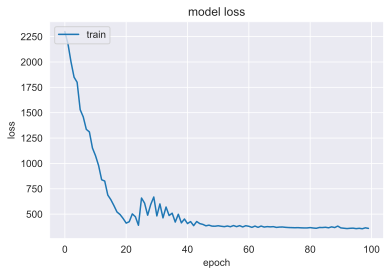

Training on:  ITA
dict_keys(['loss'])


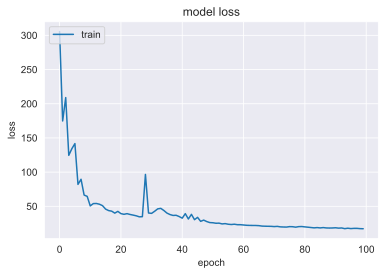

**Training Completed, elapsed time: 18.799279928207397 **


In [17]:
###########################################
### PARAMS ################################r= 0.001 | n_steps= 4 | hidden size= 25 | epochs= 50
###########################################
NumberOfSteps = [7]#[3,4,7,9,14]
LearningRates = [0.001]#[0.001, 0.0015, 0.002, 0.00075]
LSTMSizes = [25]#[25, 50, 100, 200] 
Epochs = [100]#[50, 120, 200]
Plot = True
BatchSizes=[264]

n_features = len(FEATURES)

############################################
# Testing Loss
mse = tf.keras.losses.MeanSquaredError()


#############################################
### Loop de Loops beginns ###################
#############################################


low_loss = 999999999

for lr in LearningRates:
    for BS in BatchSizes:
        for n_steps in NumberOfSteps:
            for LSTM_hidden_size in LSTMSizes:
                for train_epochs in Epochs:


                    # define model
                    model = Sequential()
                    model.add(LSTM(LSTM_hidden_size, activation='relu', input_shape=(n_steps, n_features)))
                    model.add(Dense(1))
                    opt = keras.optimizers.Adam(learning_rate=lr)
                    cosine_loss = tf.keras.losses.CosineSimilarity(axis=0)
                    model.compile(optimizer=opt, loss='mse')

                    print('**Training started with following params: lr=',lr,'| n_steps=',n_steps,'| hidden size=',LSTM_hidden_size,'| epochs=', train_epochs)
                    start = time.time()
                    for c in C_list[0:lim]:
                        country = data[data['ISO_Code']==c]
                        print('Training on: ', c)
                        # define input sequence
                        in_seq = {}
                        dataset = []

                        for idx, i in enumerate(FEATURES):
                            #print(i, country.columns[i])
                            in_seq[idx] =  np.nan_to_num(np.asarray(country.values[:, [i]]))
                            in_seq[idx] = in_seq[idx].reshape((len(in_seq[idx]), 1))


                        dataset = hstack((in_seq[0], in_seq[1]))

                        for o in range(2,len(in_seq)):
                            dataset = hstack((dataset, in_seq[o]))

                        out_seq = np.asarray(country.values[:, [PREDICTION]])
                        dataset = hstack((dataset, out_seq))

                        # convert into input/output
                        X, y = split_sequences(dataset, n_steps)


                        X = tf.convert_to_tensor(X, tf.int32)
                        # the dataset knows the number of features, e.g. 2
                        n_features = X.shape[2]
                        #print(n_features)
                        model.reset_states()
                        history = model.fit(X, y, batch_size=BS, epochs=train_epochs, verbose=0)

                        if Plot:
                            plt.figure(1)  

                             # summarize history for accuracy  

                            print(history.history.keys())  

                            plt.plot(history.history['loss'])  
                            plt.title('model loss')  
                            plt.ylabel('loss')  
                            plt.xlabel('epoch')  
                            plt.legend(['train'], loc='upper left')  
                            plt.show()  



                    end = time.time()
                    print('**Training Completed, elapsed time:',end - start,'**')


<h1> Inference </h1>

In [18]:
X_test.head()

DAY  Additional health/documents requirements upon arrival  \
5964   1                                                0.0       
5965   2                                                0.0       
5966   3                                                0.0       
5967   4                                                0.0       
5968   5                                                0.0       

      Amendments to funeral and burial regulations  Awareness campaigns  \
5964                                           0.0                  0.0   
5965                                           0.0                  0.0   
5966                                           0.0                  0.0   
5967                                           0.0                  0.0   
5968                                           0.0                  0.0   

      Border checks   Border closure   Changes in prison-related policies  \
5964             0.0              0.0                                 0.0   
5965             0.0              0.0                                 0.0   
5966             0.0              0.0                                 0.0   
5967             0.0              0.0                                 0.0   
5968             0.0              0.0                                 0.0   

      Checkpoints within the country  \
5964                             0.0   
5965                             0.0   
5966                             0.0   
5967                             0.0   
5968                             0.0   

      Closure of businesses and public services  Curfews  ...  \
5964                                        0.0      0.0  ...   
5965                                        0.0      0.0  ...   
5966                                        0.0      0.0  ...   
5967                                        0.0      0.0  ...   
5968                                        0.0      0.0  ...   

      H1_Public information campaigns  H2_Testing policy  H3_Contact tracing  \
5964                              0.0                0.0                 0.0   
5965                              0.0                0.0                 0.0   
5966                              0.0                0.0                 0.0   
5967                              0.0                0.0                 0.0   
5968                              0.0                0.0                 0.0   

      H4_Emergency investment in healthcare  H5_Investment in vaccines  \
5964                                    0.0                        0.0   
5965                                    0.0                        0.0   
5966                                    0.0                        0.0   
5967                                    0.0                        0.0   
5968                                    0.0                        0.0   

      StringencyIndex  GovernmentResponseIndex  ContainmentHealthIndex  \
5964              0.0                      0.0                     0.0   
5965              0.0                      0.0                     0.0   
5966              0.0                      0.0                     0.0   
5967              0.0                      0.0                     0.0   
5968              0.0                      0.0                     0.0   

      EconomicSupportIndex  IndustrialProduction  
5964                   0.0              0.875736  
5965                   0.0              0.875736  
5966                   0.0              0.875736  
5967                   0.0              0.875736  
5968                   0.0              0.875736  

[5 rows x 78 columns]

(426, 78)
(426, 1)
LSTM_LOSS:  104.16433568563467
RF_LOSS:  99.03387189103248
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.20327771e-02 7.57902861e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.40835643e-02 3.71165425e-02 5.68160489e-02 7.31266066e-02
 8.58483538e-02 9.37293842e-02 9.89014730e-02 1.08951628e-01
 1.14378087e-01 1.15936026e-01 1.14178047e-01 1.09968707e-01
 1.03982285e-01 9.71768126e-02 9.02530551e-02 8.37997496e-02
 7.82779232e-02 7.40746483e-02 7.12745562e-02 6.93729147e-02
 6.86367899e-02 6.92406818e-02 7.10319877e-02 7.38335699e-02
 7.74780959e-02 8.18204880e-02 8.66329297e-02 9.17674899e-02
 9.58037898e-02 9.92982984e-02 1.02392063e-01 1.05446532e-01
 1.08186111e-01 1.10279568e-01 1.12568125e-01 1.15907930e-01
 1.19064495e-01 1.24124467e-01 1.04101479e+00 8.85082960e-01
 5.77774048e-01 6.05611086e-01 6.65343940e-01 6.29582226e-01
 5.7166

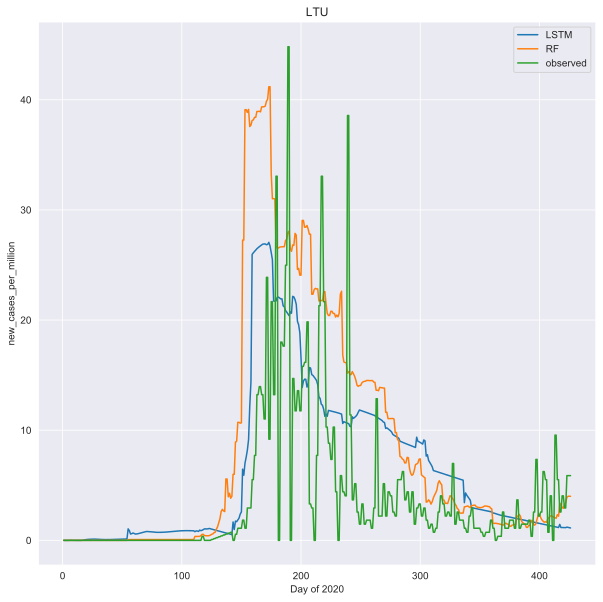

**Testing Completed**
(426, 78)
(426, 1)
LSTM_LOSS:  8652.923682054261
RF_LOSS:  7314.429242418375
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.95701146e-03 2.28582472e-02 3.51571888e-02
 4.35196608e-02 4.73607183e-02 5.07078469e-02 5.61453402e-02
 5.75181916e-02 5.51864728e-02 4.95280176e-02 4.13748473e-02
 3.14447284e-02 2.07533687e-02 9.98628139e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0

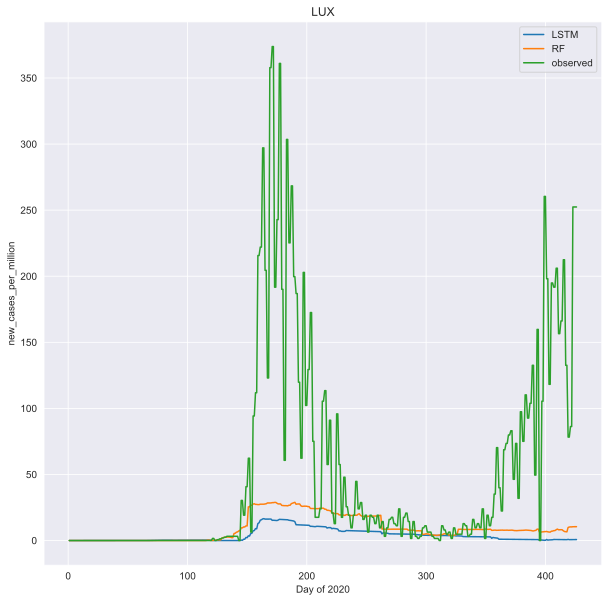

**Testing Completed**
(426, 78)
(426, 1)
LSTM_LOSS:  52.428406015132474
RF_LOSS:  19.980892988830693
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.42962956e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.00211728e-03 2.93874443e-02 4.75959629e-02 6.25966936e-02
 7.39393532e-02 8.04393813e-02 8.50039423e-02 9.35328528e-02
 9.76592153e-02 9.80017632e-02 9.48741138e-02 8.93261358e-02
 8.21851864e-02 7.40700960e-02 6.58512190e-02 5.81342652e-02
 5.13650328e-02 4.59181517e-02 4.18855250e-02 3.92848998e-02
 3.80160958e-02 3.72027308e-02 3.75534743e-02 3.88890654e-02
 4.10232246e-02 4.38477397e-02 4.71244305e-02 5.07128537e-02
 5.43966666e-02 5.68155944e-02 5.91999143e-02 6.07116520e-02
 6.17221743e-02 6.22026920e-02 6.17946163e-02 6.32534027e-02
 6.46458715e-02 6.72843456e-02 6.93681315e-02 7.65120611e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00

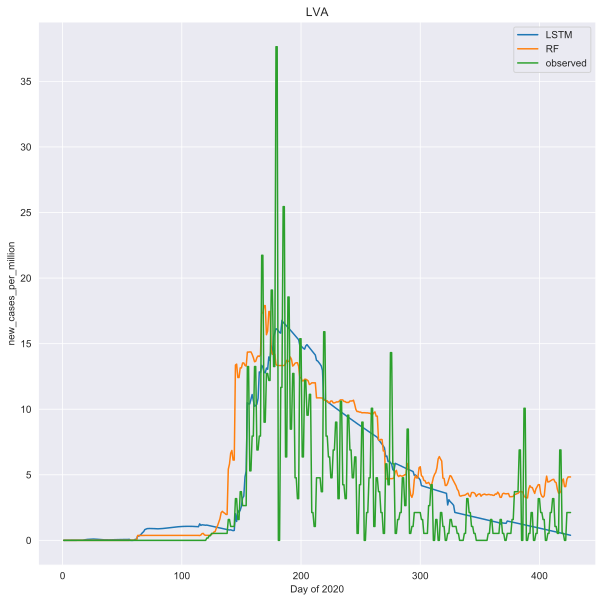

**Testing Completed**
(426, 78)
(426, 1)
LSTM_LOSS:  543.7182827063936
RF_LOSS:  160.86221473629732
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.01457262e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.72947794e-02 3.31861079e-02 4.62525785e-02
 5.54198474e-02 5.99905252e-02 6.41385540e-02 7.04347640e-02
 7.26270899e-02 7.10298344e-02 6.61262646e-02 5.85939363e-02
 4.93460149e-02 3.92869562e-02 2.91082412e-02 1.92946643e-02
 1.03925765e-02 2.81533599e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 

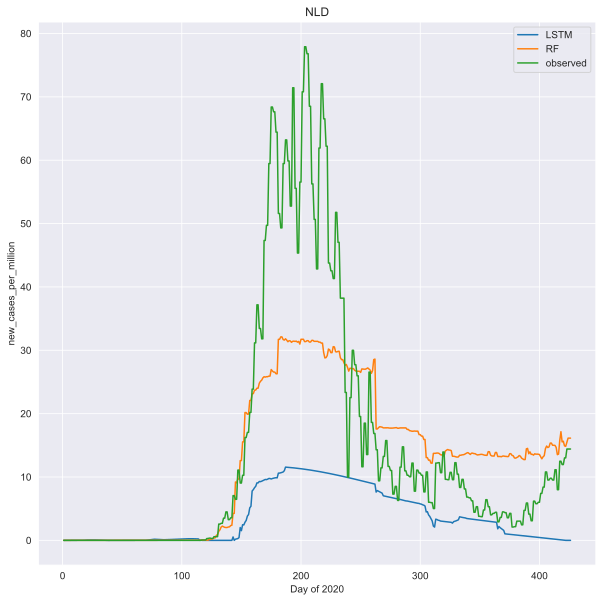

**Testing Completed**
(426, 78)
(426, 1)
LSTM_LOSS:  254.22037307347324
RF_LOSS:  82.91664079568227
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.15213245e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.95659250e-02 3.88433635e-02 5.61228618e-02 7.05741271e-02
 8.10593739e-02 8.69552344e-02 9.34540778e-02 1.01266362e-01
 1.04948007e-01 1.04721740e-01 1.01084486e-01 9.46402624e-02
 8.63951519e-02 7.71892592e-02 6.77108318e-02 5.84616065e-02
 5.00796884e-02 4.29808646e-02 3.72388512e-02 3.29116434e-02
 2.99594402e-02 2.82624662e-02 2.76588053e-02 2.71969140e-02
 2.74689943e-02 2.84628123e-02 2.99640298e-02 3.18339914e-02
 3.39576900e-02 3.62403244e-02 3.83177102e-02 3.90966088e-02
 3.96203995e-02 3.95292044e-02 3.81199867e-02 3.57793570e-02
 3.50691825e-02 3.47887576e-02 3.53057832e-02 3.43528092e-02
 3.67162228e-02 4.95342314e-02 6.31641671e-02 

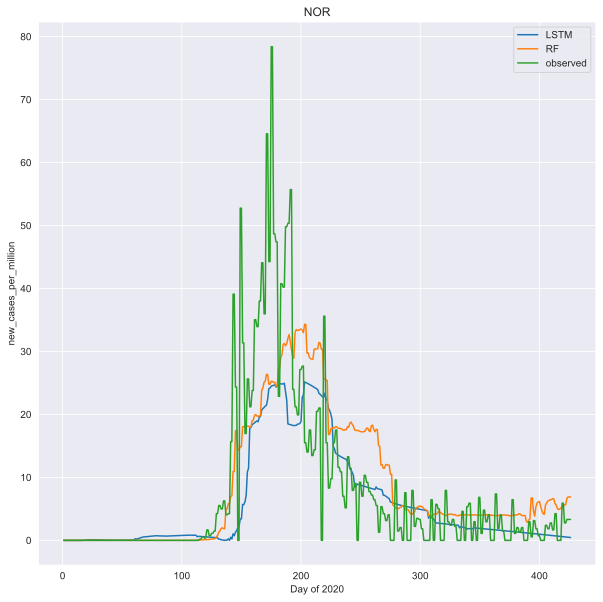

**Testing Completed**
(426, 78)
(426, 1)
LSTM_LOSS:  921.6732722128963
RF_LOSS:  315.0954002525603
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.08748674e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.59557909e-02 3.20046544e-02 4.51500267e-02
 5.44598624e-02 5.91003075e-02 6.29227012e-02 6.93198889e-02
 7.15888366e-02 7.00463578e-02 6.52645826e-02 5.78130409e-02
 4.87416387e-02 3.88822556e-02 2.89253891e-02 1.93170160e-02
 1.06801987e-02 3.37454677e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0

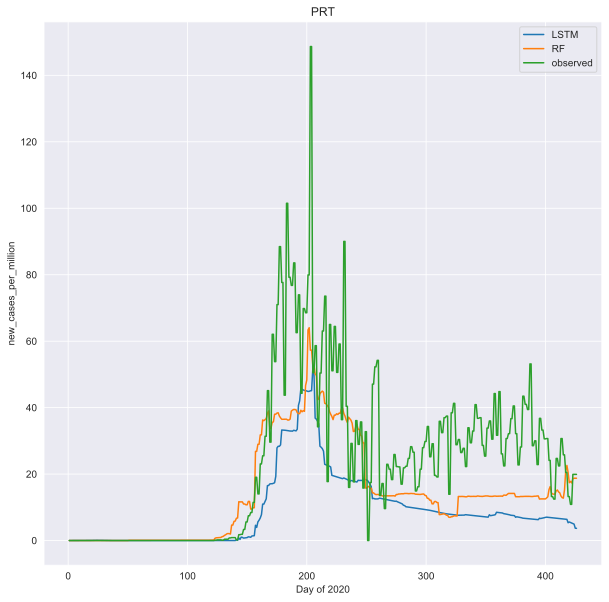

**Testing Completed**
(426, 78)
(426, 1)
LSTM_LOSS:  3379.831482472595
RF_LOSS:  3036.5855545829663
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.78087652e-02 6.00387156e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.01220012e-02
 3.08393836e-02 5.14567792e-02 6.97393343e-02 8.51515830e-02
 9.66004506e-02 1.03409603e-01 1.11199364e-01 1.20068863e-01
 1.24769583e-01 1.25468329e-01 1.22736722e-01 1.17060557e-01
 1.09591074e-01 1.01084486e-01 9.21595767e-02 8.34914446e-02
 7.56539628e-02 6.90488592e-02 6.37819692e-02 5.99283278e-02
 5.74593171e-02 5.62692061e-02 5.58304340e-02 5.59139550e-02
 5.68550453e-02 5.85526899e-02 6.07701987e-02 6.33697882e-02
 6.62335604e-02 6.92565516e-02 7.19730780e-02 7.35083818e-02
 7.47925639e-02 7.49629140e-02 7.44166151e-02 7.29195401e-02
 7.31123015e-02 7.35648423e-02 7.50109553e-02 7.50305876e-02
 7.98405707e-02 9.33032855e-02 1.07704535e-01 

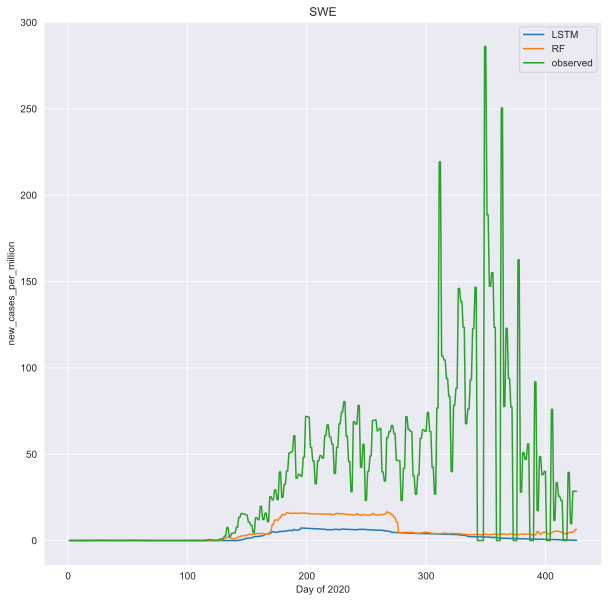

**Testing Completed**


In [20]:
best_forest_estimator = search.best_estimator_

for c in C_list[lim:]:
    
    X_test = pd.DataFrame()
    y_test = pd.DataFrame()
    
    country = data[data['ISO_Code']==c]
    
    country_feats = country.iloc[:, FEATURES]
    country_pred = country.iloc[:, PREDICTION]
    
    X_test = X_test.append(country_feats)
    y_test = pd.concat([y_test, country_pred])
    
    X_train_arr = np.asarray(X_train)
    y_train_arr = np.asarray(y_train)

    X_test_arr = np.asarray(X_test)
    y_test_arr = np.asarray(y_test)

    print(X_test_arr.shape)
    print(y_test_arr.shape)
    y_test_arr = np.nan_to_num(y_test_arr)

    y_pred_test = best_forest_estimator.predict(X_test_arr)


    
    #country = data_normalized[data['Country']==c]


    # define input sequence
    in_seq = {}
    dataset = []
    res = [0,0,0,0,0,0]
    for idx, i in enumerate(FEATURES):
        #print(i, country.columns[i])
        in_seq[idx] = np.asarray(country.values[:, [i]])
        in_seq[idx] = in_seq[idx].reshape((len(in_seq[idx]), 1))


    dataset = hstack((in_seq[0], in_seq[1]))

    for o in range(2,len(in_seq)):
        dataset = hstack((dataset, in_seq[o]))

    out_seq = np.asarray(country.values[:, [PREDICTION]])
    dataset = hstack((dataset, out_seq))



    # convert into input/output
    X, y = split_sequences(dataset, n_steps)

    for i in range(len(X)):
        x_input = X[i].astype(np.float32)
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        res.append(max(yhat[0][0],0))



    y = np.asarray(y).astype(np.float32)
    res = np.asarray(res).astype(np.float32)

    print('LSTM_LOSS: ', np.mean((y_test_arr-res)**2))
    print('RF_LOSS: ', np.mean((y_test_arr-y_pred_test)**2))

    print(res)

  #  a_err = (mse(y, res).numpy())


    days = np.array(X_test.DAY)
    plt.figure(num=None, figsize=(10, 10), dpi=200, facecolor='w', edgecolor='k')
    plt.plot(days, res)
    plt.plot(days, y_pred_test)
    plt.plot(days, y_test_arr)
    plt.title(c)
    plt.ylabel(country.columns[PREDICTION])
    plt.xlabel('Day of 2020')
    plt.title(c)
    plt.legend(["LSTM","RF", "observed"])
    plt.show()


    print('**Testing Completed**')